In [1]:
# Import all necessity functions for Machine Learning
import sys
import math
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as shc
import warnings
import zipfile
import cv2
import os
import re
import nltk
import random
import requests
from bs4 import BeautifulSoup
import re
from collections import Counter
from functools import reduce
from itertools import chain
from wordcloud import WordCloud
from google.colab.patches import cv2_imshow
from keras.preprocessing import image
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression, SelectKBest, chi2, VarianceThreshold
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.over_sampling import RandomOverSampler, SMOTE, SMOTEN, SMOTENC, SVMSMOTE, KMeansSMOTE, BorderlineSMOTE, ADASYN
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor, NearestNeighbors
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier, SGDRegressor, Perceptron
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, ExtraTreeClassifier, ExtraTreeRegressor
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, RandomForestClassifier, RandomForestRegressor, VotingClassifier, VotingRegressor
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier, GradientBoostingRegressor, StackingClassifier, StackingRegressor
from sklearn.metrics import classification_report, mean_absolute_error, mean_squared_error, r2_score, accuracy_score, recall_score, precision_score, f1_score, silhouette_score
from xgboost import XGBClassifier, XGBRegressor

# Download keras
!pip install keras

# Import all necessity functions for Neural Network
import tensorflow as tf
from keras.models import Sequential, Model
from keras.utils import plot_model
from keras.layers import Dense, Conv2D, LSTM, GRU, RNN, Flatten, AvgPool2D, MaxPool2D, GlobalAveragePooling2D, BatchNormalization, Dropout, LeakyReLU, ELU, PReLU,  Embedding
from keras.activations import tanh, relu, sigmoid, softmax, swish
from keras.regularizers import L1, L2, L1L2
from keras.optimizers import SGD, Adagrad, Adadelta, RMSprop, Adam, Adamax, Nadam
from keras.initializers import HeNormal, HeUniform, GlorotNormal, GlorotUniform
from keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy, hinge, MSE, MAE, Huber, BinaryCrossentropy
import keras.utils as image
from google.colab.patches import cv2_imshow
from keras.utils import plot_model

# Plotting the confusion matrix
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix

In [2]:
# Remove all warnings
import warnings
warnings.filterwarnings("ignore")

#####Import the dataset

In [3]:
df = pd.read_csv('/content/Salary_dataset.csv')
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [4]:
# Remove the first column
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

df.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


#####Check the NaN value

In [5]:
'NaN value presence in the dataset' if df.isnull().sum().sum() > 0 else 'No NaN value in the dataset'

'No NaN value in the dataset'

#####Check the distribution of the dataset

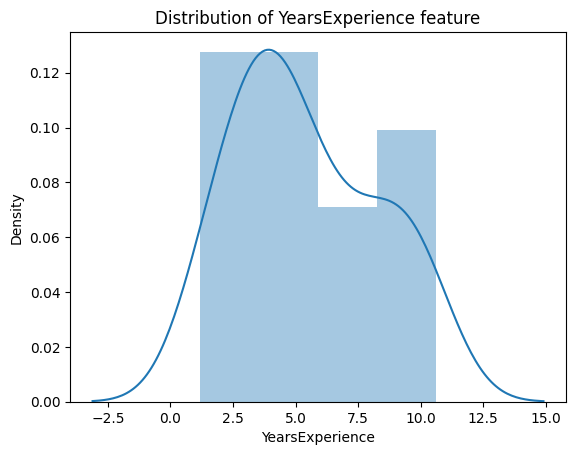

In [6]:
plt.title('Distribution of YearsExperience feature')
sns.distplot( df.loc[: , 'YearsExperience'])
plt.show()

#####Determine the outliers of YearsExperience

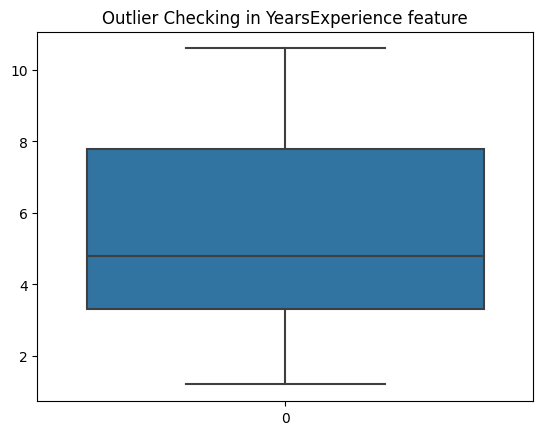

In [7]:
plt.title('Outlier Checking in YearsExperience feature')
sns.boxplot(df.loc[:, 'YearsExperience'])
plt.show()

#####Check duplicate instances

In [8]:
'duplicate instances' if df.duplicated().sum() > 0 else "No duplicate instances"

'No duplicate instances'

#####Check the shape

In [9]:
df.shape

(30, 2)

#####Check the data types

In [10]:
df.dtypes

YearsExperience    float64
Salary             float64
dtype: object

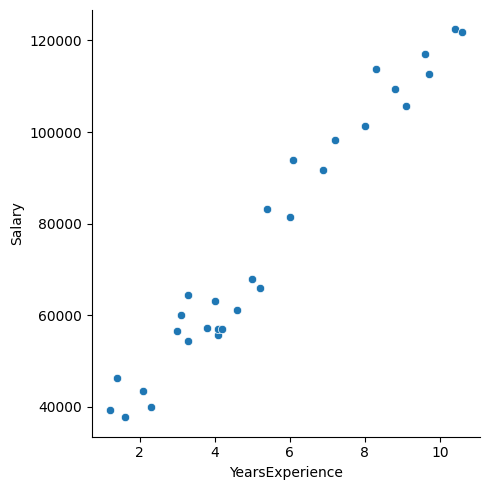

In [11]:
# Show the realtionship of salary and target
sns.relplot(x = df.loc[:, 'YearsExperience'], y = df.loc[:, 'Salary'])
plt.show()

In [12]:
# standard_scaler = StandardScaler()
# df = standard_scaler.fit_transform(df)
# df = pd.DataFrame(df)

In [101]:
train_df = pd.read_csv('/content/sample_data/california_housing_train.csv')
test_df  = pd.read_csv('/content/sample_data/california_housing_test.csv')
df = pd.concat([train_df, test_df], axis = 0)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [102]:
standard_scaler = StandardScaler()
df = standard_scaler.fit_transform(df)
df = pd.DataFrame(df)

In [103]:
df.head()

,0,1,2,3,4,5,6,7,8
0,2.623418,-0.672608,-1.083122,1.367000,1.771212,-0.362998,-0.072109,-1.251656,-1.213134
1,2.543560,-0.574297,-0.765205,2.303469,3.240469,-0.262204,-0.095687,-1.079894,-1.098902
2,2.498640,-0.906681,-0.924164,-0.880893,-0.865368,-0.965993,-1.002110,-1.168880,-1.050440
3,2.493649,-0.930088,-1.162601,-0.522020,-0.477846,-0.805076,-0.716560,-0.358064,-1.156884
4,2.493649,-0.962858,-0.685726,-0.543617,-0.503998,-0.708703,-0.622251,-1.024640,-1.225250


#####Split the dataset into train and test

In [104]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

print("X_train shape # {} ".format(X_train.shape),'\n')
print("X_test shape  # {} ".format(X_test.shape),'\n')
print("y_train shape # {} ".format(y_train.shape),'\n')
print("y_test shape  # {} ".format(y_test.shape))

X_train shape # (14000, 8)  

X_test shape  # (6000, 8)  

y_train shape # (14000,)  

y_test shape  # (6000,) 


#####Create the DataLoader with batch_size = 8

In [105]:
# Import all the necessity functions of PyTorch
import torch
import torch.nn as nn
import torch.optim as optim
import torch.functional as F
from torch.utils.data import Dataset, DataLoader
from torchsummary import summary

In [106]:
X_train = torch.tensor(data = X_train, dtype = torch.float32)
y_train = torch.tensor(data = y_train, dtype = torch.float32)

X_test  = torch.tensor(data = X_test, dtype = torch.float32)
y_test  = torch.tensor(data = y_test, dtype = torch.float32)

BATCH_SIZE = 64

train_loader = DataLoader(dataset = list(zip(X_train, y_train)), batch_size = BATCH_SIZE, shuffle = True)
test_loader  = DataLoader(dataset = list(zip(X_test, y_test)), batch_size = BATCH_SIZE, shuffle = True)

train_data, train_label = next(iter(train_loader))
test_data , test_label  = next(iter(test_loader))

print("Batch size of Train # {} ".format(train_loader.batch_size),'\n')
print("Batch size of Test  # {} ".format(test_loader.batch_size),'\n')

print("Shape of Train with Batch # {} ".format(train_data.shape),'\n')
print("Shape of Test with Batch  # {} ".format(test_data.shape),'\n')

print("Shape of Test with Batch  # {} ".format(train_label.shape),'\n')
print("Shape of Test with Batch  # {} ".format(test_label.shape))

Batch size of Train # 64  

Batch size of Test  # 64  

Shape of Train with Batch # torch.Size([64, 8])  

Shape of Test with Batch  # torch.Size([64, 8])  

Shape of Test with Batch  # torch.Size([64])  

Shape of Test with Batch  # torch.Size([64]) 


#####Model Building

In [107]:
"""
    Create a class named SalaryPrediction with TWO parameters
    1. input_dimension  : Define the number of features
    2. output_dimension : Define the number of output
"""
class SalaryPrediction(nn.Module):
  # Define the constructor
  def __init__(self, input_dimension = None, output_dimension = None):
    # Call the super() class that will inherit the parent class in PyTorch
    super().__init__()
    """
        Create the Sequential model that will take
        1. in_features  : Define the input_dimension
        2. out_features : Define the output_dimension
        3. Weight Init  : he_normal
        4. Activation (ReLU)
        5. Dropour Rate : Define ratio would be 0.2
    """
    self.firstLayer = nn.Sequential(
        nn.Linear(in_features = input_dimension, out_features = 256),
        nn.ReLU(),
        nn.Dropout(p = 0.2)
    )

    """
        Create the Sequential model that will take
        1. in_features  : Define the out_features
        2. out_features : 64
        3. Weight Init  : he_normal
        4. Activation (ReLU)
        5. Dropour Rate : Define ratio would be 0.2
    """
    self.secondLayer = nn.Sequential(
        nn.Linear(in_features = 256, out_features = 128),
        nn.ReLU(),
        nn.Dropout(p = 0.5)
    )

    """
        Create the Sequential model that will take
        1. in_features  : 64
        2. out_features : 1
    """
    self.outputLayer = nn.Linear(in_features = 128, out_features = 1)


  def forward(self, x):
    """
        For the first layer
        x: Define the training dataset
    """
    x = self.firstLayer(x)

    """
        For the Second layer
        x: Define the training dataset
    """
    x = self.secondLayer(x)

    """
        For the output layer with respect to the regression layer
    """
    x = self.outputLayer(x)

    return x


In [108]:
# Call the model
try:
  model = SalaryPrediction(input_dimension = X_train.shape[1], output_dimension = 1)
except Exception as e:
  print(e.with_traceback)
else:
  print(model.parameters)

<bound method Module.parameters of SalaryPrediction(
  (firstLayer): Sequential(
    (0): Linear(in_features=8, out_features=256, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
  )
  (secondLayer): Sequential(
    (0): Linear(in_features=256, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
  )
  (outputLayer): Linear(in_features=128, out_features=1, bias=True)
)>


In [109]:
# Display the model
summary(model = model, input_size = X_train.shape)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1           [-1, 14000, 256]           2,304
              ReLU-2           [-1, 14000, 256]               0
           Dropout-3           [-1, 14000, 256]               0
            Linear-4           [-1, 14000, 128]          32,896
              ReLU-5           [-1, 14000, 128]               0
           Dropout-6           [-1, 14000, 128]               0
            Linear-7             [-1, 14000, 1]             129
Total params: 35,329
Trainable params: 35,329
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.43
Forward/backward pass size (MB): 123.15
Params size (MB): 0.13
Estimated Total Size (MB): 123.72
----------------------------------------------------------------


#####Initialize the loss_function & optimizer

In [110]:
LEARNING_RATE = 0.001
loss_function = nn.MSELoss()
optimizer = optim.Adam(params = model.parameters(), lr = LEARNING_RATE)

#####Fit the model

In [111]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from sklearn.metrics import r2_score

class Fit:
    def __init__(self):
        self.EPOCHS = 1
        self.TRAIN_LOSS = []
        self.VAL_LOSS = []
        self.TRAIN_ACCURACY = []
        self.VAL_ACCURACY = []
        self.history = {'loss': [], 'val_loss': [], 'train_r2': [], 'val_r2': []}

    def l1(self, model=None, l1_lambda=0.01):
       return sum(torch.norm(parameter, 1) for parameter in model.parameters())

    def l2(self, model, l2_lambda=0.01):
        return sum(torch.norm(parameter, 2) for parameter in model.parameters())

    def fit(self, model, x=None, y=None, batch_size=None, epochs=None, val_data=None, val_label=None, verbose=1):
        optimizer = torch.optim.Adam(model.parameters())  # Initialize optimizer
        loss_function = nn.MSELoss()  # Define the loss function

        train_loader = DataLoader(dataset=list(zip(x, y)), batch_size=batch_size, shuffle=True)
        test_loader = DataLoader(dataset=list(zip(val_data, val_label)), batch_size=batch_size, shuffle=True)

        self.EPOCHS = epochs
        for epoch in range(self.EPOCHS):
            total_train_loss  = []
            total_val_loss    = []

            train_predictions = []
            val_predictions   = []

            train_labels      = []
            val_labels        = []

            for X_batch, y_batch in train_loader:
                X_batch = torch.tensor(data=X_batch, dtype=torch.float32)
                y_batch = torch.tensor(data=y_batch, dtype=torch.float32)

                train_prediction = model(X_batch)
                train_loss = loss_function(train_prediction.flatten(), y_batch)

                optimizer.zero_grad()
                train_loss.backward()
                optimizer.step()

                train_predictions.extend(train_prediction.flatten().detach().numpy())
                train_labels.extend(y_batch.flatten().detach().numpy())

                total_train_loss.append(train_loss.item())

            # Calculate R2 score for the entire training dataset
            train_r2_score = r2_score(train_labels, train_predictions)

            # Validation

            for val_data, val_label in test_loader:
              val_data  = torch.tensor(data = val_data, dtype = torch.float32)
              val_label = torch.tensor(data = val_label, dtype = torch.float32)

              val_prediction = model(val_data)
              val_loss = loss_function(val_prediction,  y_batch)

              total_val_loss.extend(val_loss.flatten().detach().numpy())
              val_predictions.extend(val_prediction.flatten().detach().numpy())
              val_labels.extend(val_label.flatten().detach().numpy())

            #R2

            val_r2_score = r2_score(val_predictions, val_labels)

            # Store the training loss and R2 score in the history
            self.history['loss'].append(np.array(total_train_loss).mean())
            self.history['train_r2'].append(train_r2_score)

            self.history['val_loss'].append(np.array(total_train_loss).mean())
            self.history['val_r2'].append(val_r2_score)

            if verbose:
                print("Epoch {}/{} ".format(epoch + 1, self.EPOCHS))
                print("{}/{} [=========================] loss: {} - R2_score: {} - val_loss: {} - val_R2_score: {}".\
                      format(len(total_val_loss) + 1,\
                             len(total_val_loss) + 1,\
                             np.array(total_train_loss).mean(),\
                             train_r2_score,\
                             val_r2_score,\
                             val_r2_score))

In [112]:
try:
  model_fit = Fit()
  model_fit.fit(x = X_train, y = y_train, val_data = X_test, val_label = y_test, batch_size = 128, epochs = 1000, model = model)
except Exception as e:
  print(e.with_traceback)

Epoch 1/1000 
48/48 [=========================] loss: 0.4279703006148338 - R2_score: 0.5688302927081756 - val_loss: 0.37424212736887574 - val_R2_score: 0.37424212736887574
Epoch 2/1000 
48/48 [=========================] loss: 0.33329939205538145 - R2_score: 0.6638792266401512 - val_loss: 0.5225985734556107 - val_R2_score: 0.5225985734556107
Epoch 3/1000 
48/48 [=========================] loss: 0.31003170311450956 - R2_score: 0.6875626679309297 - val_loss: 0.5794896699621843 - val_R2_score: 0.5794896699621843
Epoch 4/1000 
48/48 [=========================] loss: 0.30329185629432853 - R2_score: 0.6940563971234984 - val_loss: 0.5442312880228464 - val_R2_score: 0.5442312880228464
Epoch 5/1000 
48/48 [=========================] loss: 0.2965751637112011 - R2_score: 0.7003117330711296 - val_loss: 0.5691802333442746 - val_R2_score: 0.5691802333442746
Epoch 6/1000 
48/48 [=========================] loss: 0.2859186367555098 - R2_score: 0.7122006535889027 - val_loss: 0.5599381820841037 - val_R2_s

#####Display the loss & R2

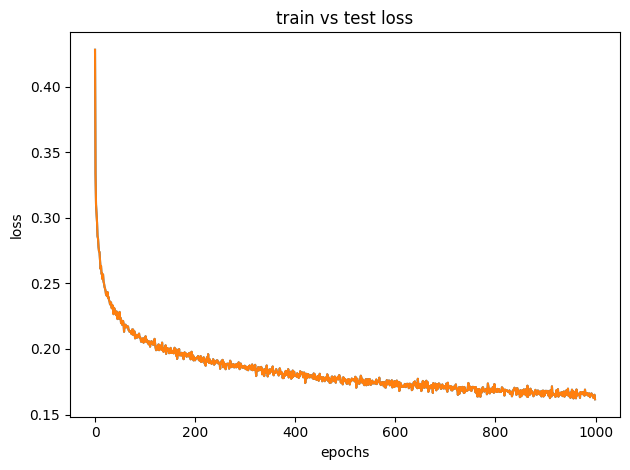

In [113]:
plt.title('train vs test loss')
plt.plot(model_fit.history['loss'], label = 'train_loss')
plt.plot(model_fit.history['val_loss'], label = 'test_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.tight_layout()
plt.show()

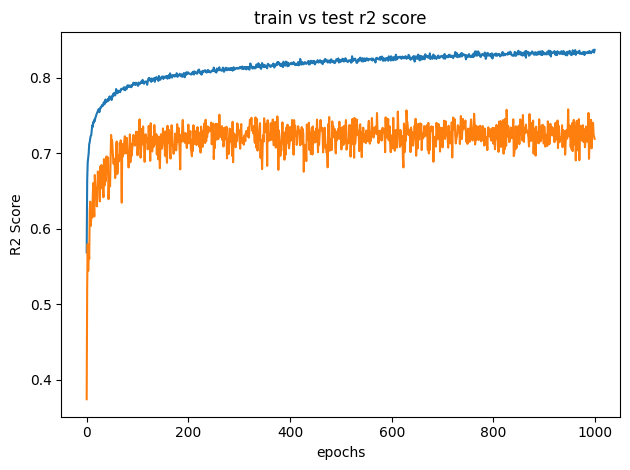

In [114]:
plt.title('train vs test r2 score')
plt.plot(model_fit.history['train_r2'], label = 'train_r2')
plt.plot(model_fit.history['val_r2'], label = 'val_r2')
plt.xlabel('epochs')
plt.ylabel('R2 Score')
plt.tight_layout()
plt.show()

#####Model evaluation

In [115]:
predicted = model(X_train)
predicted = predicted.detach().numpy()

print("MAE # {} ".format(mean_absolute_error(predicted, y_train)))
print("MSE # {} ".format(mean_squared_error(predicted, y_train)))
print("R2  # {} ".format(r2_score(predicted, y_train)))

MAE # 0.28750234842300415 
MSE # 0.1607464700937271 
R2  # 0.8002209663654772 


In [116]:
predicted = model(X_test)
predicted = predicted.detach().numpy()

print("MAE # {} ".format(mean_absolute_error(predicted, y_test)))
print("MSE # {} ".format(mean_squared_error(predicted, y_test)))
print("R2  # {} ".format(r2_score(predicted, y_test)))

MAE # 0.3216516375541687 
MSE # 0.22379019856452942 
R2  # 0.7188771134693449 
